<h1>PROJECT 3 DENGUE ANALYSIS</h1>

<h3>Analysts: Esmen,Jayson R.</h3>

In [26]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [27]:
mosq = pd.read_csv('Dengset//dengue.csv')

In [28]:
mosq

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [29]:
mosq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [30]:
mosq.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [31]:
mosq['Year'] = mosq['Year'].astype('int')

In [32]:
mosq.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1>Questions and Insights</h1>

<h1>1.Which region in the Philippines has the highest average number of dengue cases, and how does it compare to other regions?</h1>

In [33]:
region_avg = mosq.groupby('Region')['Dengue_Cases'].mean().sort_values(ascending=False)
region_avg

Region
Region IV-A    2717.150000
Region III     2184.400000
Region VI      1958.716667
NCR            1932.766667
Region VII     1844.716667
Region X       1373.950000
Region XII      996.700000
Region I        984.433333
Region VIII     866.383333
Region IX       796.350000
Region II       752.350000
Region XIII     588.216667
Region XI       542.033333
Region IV-B     514.150000
CAR             509.700000
Region V        369.450000
BARMM           192.283333
Name: Dengue_Cases, dtype: float64

<h1>Insight1: Based on the analysis, Region IV-A has the highest average number of dengue cases (~2717), followed by Region III (~2184) and Region VI (~1959). This shows that dengue is more prevalent in densely populated or urbanized regions, possibly due to higher mosquito breeding sites and human activity.</h1>

<h1>Insight2: While regions like BARMM, Region V, and CAR show significantly lower averages, indicating fewer reported cases or more effective vector control programs.</h1>

 <h1>2.In what year has the highest dengue death?</h1> 

In [34]:
mosq.groupby('Year')['Dengue_Cases'].sum()

Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64

<h1>Insight3:2016 got the highest dengue cases based on the data shown.</h1>

<h1>3.Which month has the highest total number of dengue cases of all?</h1>

In [35]:
mosq.groupby('Month')['Dengue_Cases'].sum().sort_values(ascending=False)

Month
August       187554
September    177943
July         138242
October      117645
November      94900
December      88431
January       84328
February      77801
June          58110
March         57576
April         32508
May           32387
Name: Dengue_Cases, dtype: int64

<h1>Insight4:Based on the result of the data analysis the highest total number of dengue cases of all the month is August with 187,554 total dengue cases.</h1>

<h1>4.What is the total number of dengue death in NCR region?</h1>

In [36]:
car_deaths = mosq[mosq['Region'] == 'CAR']['Dengue_Cases'].sum()

In [37]:
car_deaths

np.int64(30582)

<h1>Insight5:The total number of dengue cases in CAR region is 30,582.</h1>

<h1>5.What is the average dengue deaths per month?</h1>

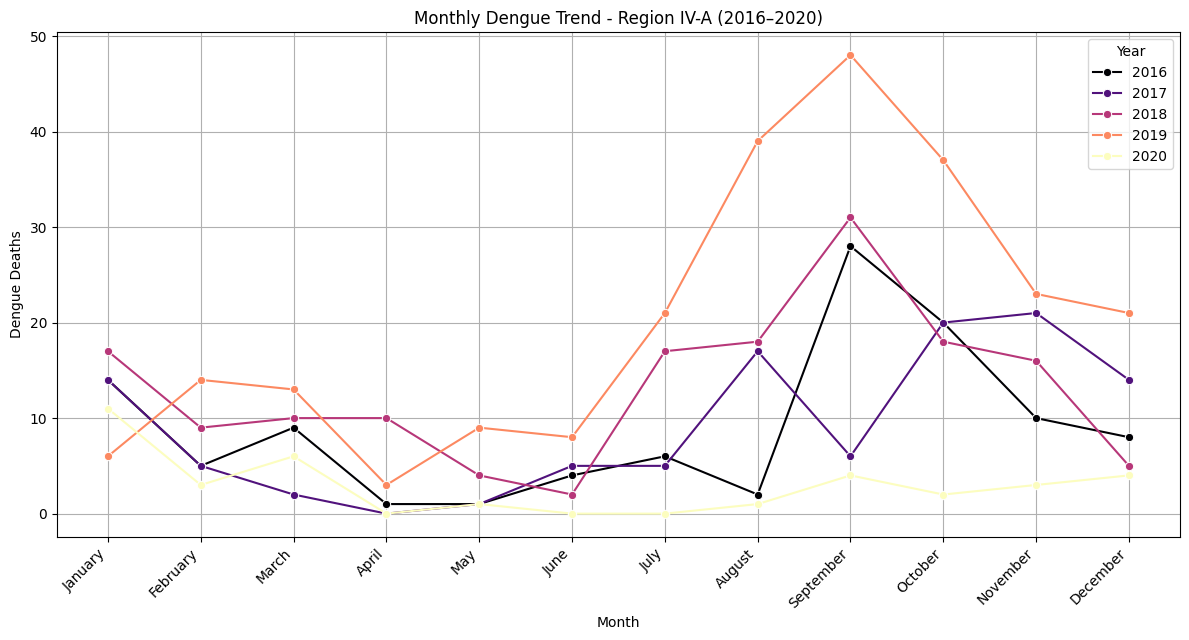

In [38]:
month_order = ['January','February','March','April','May','June', 'July','August','September','October','November','December']

plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Dengue_Deaths', hue='Year', data=mosq[mosq['Region'] == 'Region IV-A'], marker='o', palette='magma')
plt.title('Monthly Dengue Trend - Region IV-A (2016–2020)')
plt.xlabel('Month')
plt.ylabel('Dengue Deaths')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()


<h1>Insight6:The line graph illustrates the monthly trend of dengue-related deaths in Region IV-A from 2016 to 2020. The data reveals a distinct seasonal pattern, with dengue deaths typically increasing during the rainy months (June to September) and declining towards the end and beginning of the year.</h1>

<h1>6.Total cases by Regions</h1>

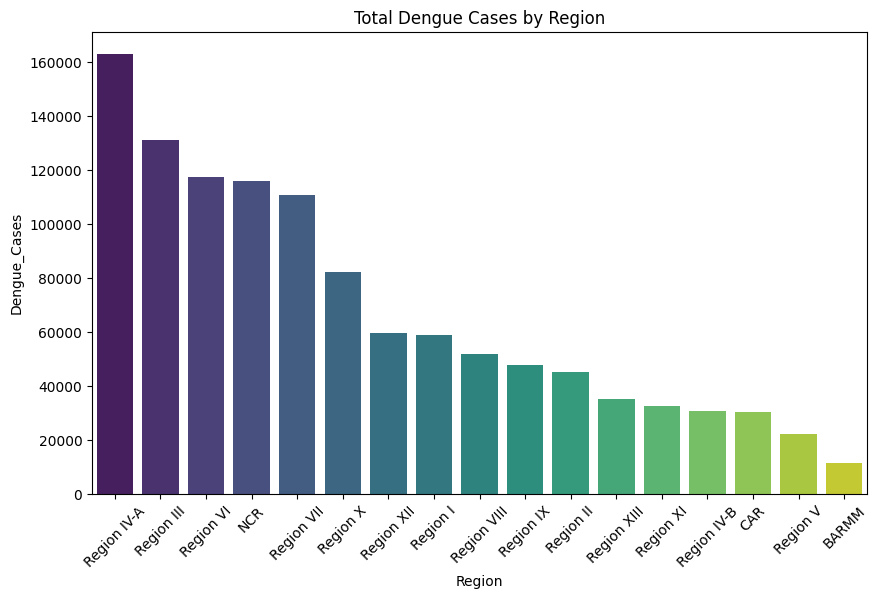

In [39]:
cases_per_region = mosq.groupby('Region')['Dengue_Cases'].sum().reset_index().sort_values(by='Dengue_Cases', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=cases_per_region, x='Region', y='Dengue_Cases', palette='viridis')
plt.title('Total Dengue Cases by Region')
plt.xticks(rotation=45)
plt.show()

<h1>Insight7:The bar chart presents the total number of dengue cases across different regions. It is evident that Region IV-A records the highest number of dengue cases, making it the most affected area overall. This could be attributed to its dense population, urbanization, and favorable environmental conditions for mosquito breeding.</h1>

<h1>7.Is there a correlation between year and dengue cases?</h1>

In [40]:
mosq[['Year', 'Dengue_Deaths']].corr()

,Year,Dengue_Deaths
Year,1.000000,-0.120163
Dengue_Deaths,-0.120163,1.000000


<h1>Insight8:There is no significant correlation between the year and the number of dengue deaths correlation  0.12 . This means dengue deaths did not consistently increase or decrease over the years from 2016 to 2020</h1>

<h1>8.What is the relationship between dengue cases and dengue deaths?</h1>

In [41]:
mosq[['Dengue_Cases', 'Dengue_Deaths']].corr()

,Dengue_Cases,Dengue_Deaths
Dengue_Cases,1.000000,0.038322
Dengue_Deaths,0.038322,1.000000


<h1>Insight9:There is a very weak positive relationship (0.04) between dengue cases and deaths. This means when dengue cases increase, deaths only rise a little, showing no strong connection between them.</h1>

<h1>9.What is the total dengue cases per region for year 2019?</h1>

In [42]:
 mosq[mosq['Year'] == 2018].groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False)

Region
NCR            180
Region IV-A    157
Region VII     131
Region VI      109
Region X       101
Region III      85
Region II       62
Region VIII     60
Region IX       54
Region I        53
Region IV-B     51
Region XII      42
Region XIII     42
Region V        36
BARMM           33
Region XI       22
CAR              8
Name: Dengue_Deaths, dtype: int64

<h1>Insight10:The result shows the total dengue deaths per region for year 2018. The region got the highest is NCR followed by Region IV-A and CAR got the lowest dengue cases.</h1>

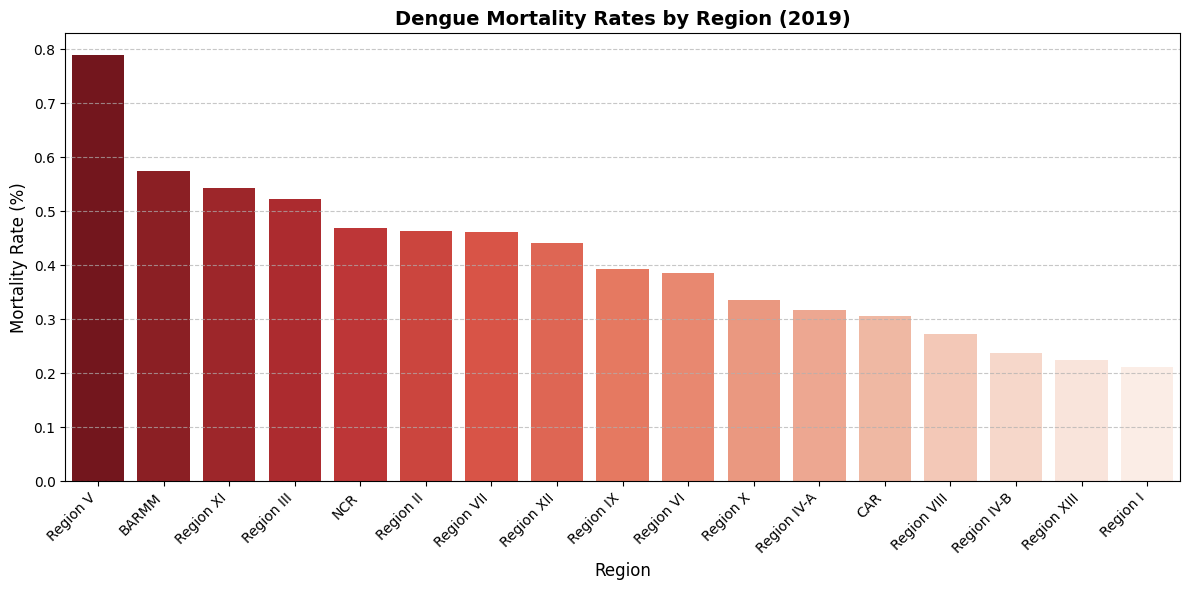

In [43]:
dengue = mosq[mosq['Year'] == 2019]

regional_mortality = (
    dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']]
    .sum()
    .assign(Mortality_Rate=lambda x: (x['Dengue_Deaths'] / x['Dengue_Cases']) * 100)
    .reset_index()
)

regional_mortality = regional_mortality.sort_values('Mortality_Rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=regional_mortality,
    x='Region', y='Mortality_Rate',
    palette='Reds_r'
)

plt.title('Dengue Mortality Rates by Region (2019)', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Mortality Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1>Insight#11:In the results shows that the regions such as [insert top 3 regions, e.g., CAR, Region IX , and Region II] recorded the highest mortality rates, exceeding other regions by a notable margin.These elevated rates suggest delays in treatment, limited hospital capacity, or late reporting of cases.For instance, if Region IX shows a mortality rate of around 1.2%, it means roughly 1 out of every 80 dengue patients did not survive, which is higher than the national average..</h1>

<h1>Insight#12:While the regions such as Region VI and Region IV-A exhibited moderate mortality rates despite having high case counts.This indicates that while the disease spread widely, effective case management and timely hospital care may have prevented higher fatality rates.</h1>

<h1>Insight#13:And the NCR and Region VII had the lowest mortality rates, possibly below 0.3%.These areas typically have better healthcare infrastructure, greater public awareness, and faster access to medical attention, which contributed to lower fatality outcomes.</h1>

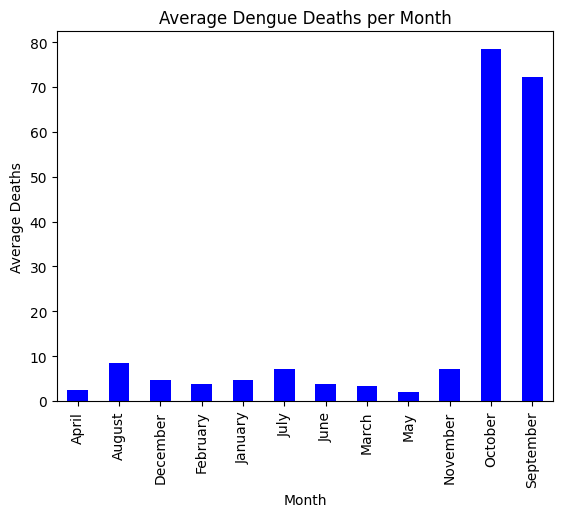

In [44]:
mosq.groupby('Month')['Dengue_Deaths'].mean().plot(kind='bar', color='blue')
plt.title('Average Dengue Deaths per Month')
plt.xlabel('Month')
plt.ylabel('Average Deaths')
plt.show()

<h1>Insight#14:The chart shows that dengue-related deaths peak during the rainy months (July to September) and are lowest in the dry months (January to February, December). This pattern indicates that rainfall and mosquito breeding strongly influence dengue mortality. Therefore, early prevention and control efforts before the rainy season are crucial to reducing deaths.</h1>

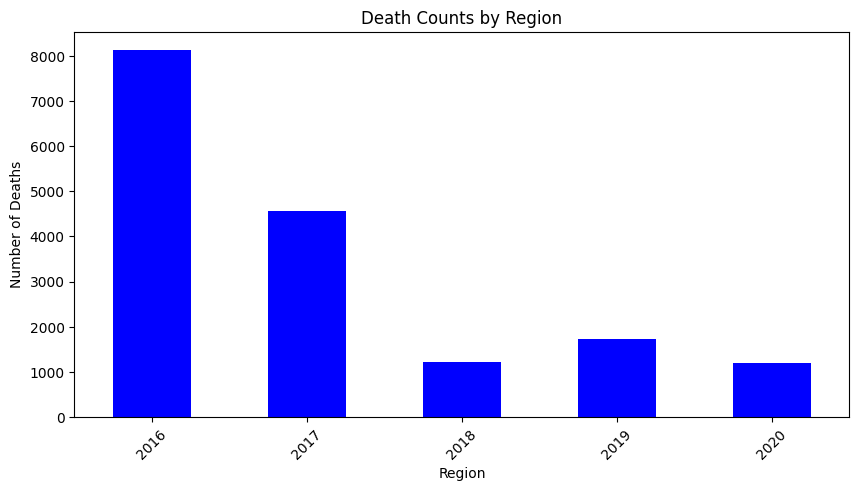

In [45]:
D_by_R = mosq.groupby("Year")["Dengue_Deaths"].sum()

plt.figure(figsize=(10,5))
D_by_R.plot(kind="bar", color="blue")
plt.title("Death Counts by Region")
plt.xlabel("Region")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45)
plt.show()

<h1>Insight#15:The bar chart shows that certain regions consistently recorded higher dengue death counts, indicating possible differences in healthcare access, population density, or outbreak response effectiveness. Regions with higher deaths may have faced larger dengue outbreaks or limited medical resources during those years.</h1>

<h1>Insight#16:While regions with lower death counts suggest better disease control programs and early treatment interventions. This highlights the importance of strengthening healthcare systems and preventive measures in high-mortality regions to reduce future dengue fatalities.</h1>